<a href="https://colab.research.google.com/github/drbarak/DS_Project1/blob/main/Classification_Project_Shufersal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Classification Project

for Shufersal on-line orders, for replacing of missing products, will predict the replacement success!

In [106]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from IPython.display import display
p = print
d = display

# Get Data

## Raw Data

To run the raw section, one must load Sweets_ver2.csv to local google drive and change the next line to True

In [107]:
id = ''   # to identify results csv

RAW = False
DIFF = True
RATIO = False
REL = False

In [108]:
def get_raw(fname):
  data_url = 'https://github.com/DanielKorenDataScience/ClassificationProject/blob/main/' + fname + '.csv?raw=true'
  resp = requests.get(data_url)
  text = resp.text
  
  with open(fname + '.csv', 'w') as fh:
    fh.write(text)

In [109]:
def diff_list(li1, li2):
  return [i for i in li1 + li2 if i not in li1 or i not in li2]

In [110]:
if RAW:    
  df1 = pd.read_csv('/content/drive/MyDrive/Sweets_ver2.csv', encoding='ISO-8859-8', nrows=1)
  df2 = pd.read_csv('/content/drive/MyDrive/Sweets_ver2.csv', encoding='ISO-8859-8', usecols=[i for i in range(82) if not i in[0,8,10,12,14,16,18,20,24,26,27,48,50,52,54,56,58,62,64,65]])

In [111]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [112]:
if RAW:
  df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 82 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   OrderNumbert                1 non-null      int64  
 1   HouseHoldID                 1 non-null      int64  
 2   LocationCityName            1 non-null      object 
 3   QuarterNumber               1 non-null      int64  
 4   MonthNumber                 1 non-null      int64  
 5   WeekNumber                  1 non-null      int64  
 6   DayNumberInWeek             1 non-null      int64  
 7   PeriodHoliday               1 non-null      object 
 8   TransactionDate             1 non-null      object 
 9   DepartmentCode              1 non-null      int64  
 10  DepartmentName              1 non-null      object 
 11  CategoryCode                1 non-null      int64  
 12  CategoryName                1 non-null      object 
 13  GroupCode                   1 non-null 

Eliminating unwanted columns - mostly descriptive columns

In [113]:
if RAW:
  d(diff_list(list(df1.columns), list(df2.columns)))

['OrderNumbert',
 'TransactionDate',
 'DepartmentName',
 'CategoryName',
 'GroupName',
 'SubGroupName',
 'CompoundIDDesc',
 'ProductDescription',
 'VendorName',
 'ItemsPerPackageWH',
 'DescriptionTavit',
 'DepartmentNameSusb',
 'CategoryNameSubs',
 'GroupNameSubs',
 'SubGroupNameSubs',
 'CompoundIDDescSubs',
 'ProductDescriptionSubs',
 'VendorNameSubs',
 'ItemsPerPackageWHSubs',
 'DescriptionTavitSubs']

In [114]:
if RAW:
  d(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54460 entries, 0 to 54459
Data columns (total 62 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   HouseHoldID                 54460 non-null  int64  
 1   LocationCityName            54460 non-null  object 
 2   QuarterNumber               54460 non-null  int64  
 3   MonthNumber                 54460 non-null  int64  
 4   WeekNumber                  54460 non-null  int64  
 5   DayNumberInWeek             54460 non-null  int64  
 6   PeriodHoliday               54460 non-null  object 
 7   DepartmentCode              54460 non-null  int64  
 8   CategoryCode                54460 non-null  int64  
 9   GroupCode                   54460 non-null  int64  
 10  SubGroupCode                54460 non-null  int64  
 11  CompoundID                  54460 non-null  int64  
 12  ParentProductNumber         54460 non-null  int64  
 13  BrandIndDesc                544

None

In [115]:
# Fix Typo mistake
if RAW: 
  df2.rename(columns={'OrderNumbert': 'OrderNumber','BrandIndDescSuss': 'BrandIndDescSubs', 'ProductNumberSubs': 'ParentProductNumberSubs', 
                    'NetSaleNoVatPrdSubs': 'NetSaleNoVatPrdLast3MonthsSubs', 'CafiotSucarSusb': 'CafiotSucarSubs'}, inplace=True)

Eliminating nulls

In [116]:
# Fill na
if RAW:
  df2.fillna({'QuantSale': 1, 'QuantSaleSubs': 1}, inplace=True)
  df2.fillna(0, inplace=True)
  d(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54460 entries, 0 to 54459
Data columns (total 62 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   HouseHoldID                     54460 non-null  int64  
 1   LocationCityName                54460 non-null  object 
 2   QuarterNumber                   54460 non-null  int64  
 3   MonthNumber                     54460 non-null  int64  
 4   WeekNumber                      54460 non-null  int64  
 5   DayNumberInWeek                 54460 non-null  int64  
 6   PeriodHoliday                   54460 non-null  object 
 7   DepartmentCode                  54460 non-null  int64  
 8   CategoryCode                    54460 non-null  int64  
 9   GroupCode                       54460 non-null  int64  
 10  SubGroupCode                    54460 non-null  int64  
 11  CompoundID                      54460 non-null  int64  
 12  ParentProductNumber             

None

In [117]:
if RAW:
  df2.to_csv("Shufersal.csv", index = False)
  p(df2.shape)

(54460, 62)


In [118]:
if RAW:
  df = pd.read_csv('Shufersal.csv', index_col=False)
  p(df.shape)

(54460, 62)


## Encoding categories

In [119]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

if RAW:
  enc.fit(['noPromo', 'PromoSusbSamePromo', 'PromoSusbDiffPromo'])
  p(df.isPromo.value_counts())
  p()
  df.isPromo = enc.transform(df.isPromo)
  p(df.isPromo.value_counts())

PromoSusbDiffPromo    30490
noPromo               22062
PromoSusbSamePromo     1908
Name: isPromo, dtype: int64

0    30490
2    22062
1     1908
Name: isPromo, dtype: int64


In [120]:
if RAW:
  for col in ['LocationCityName', 'PeriodHoliday', 'BrandIndDesc', 'BrandName', 'BrandIndDescSubs', 'BrandNameSubs']:
    p(col)
    p(pd.DataFrame(df[col].value_counts()).index)
    df[col] = enc.fit_transform(df[col])
    p(pd.DataFrame(df[col].value_counts()).index)

LocationCityName
Index(['ראשון לציון', 'תל אביב', 'חיפה', 'רחובות', 'ירושלים', 'כפר סבא',
       'פתח תקוה', 'ראש העין', 'רמת גן', 'רעננה', 'רמת השרון', 'נס ציונה',
       'מודיעין', 'חולון', 'גבעתיים', 'נתניה', 'הוד השרון', 'אילת', 'יהוד',
       'אשקלון', 'קרית מוצקין', 'חריש', 'כרמיאל', 'הרצליה', 'רמת אביב א',
       'שוהם', 'עפולה', 'באר יעקב', 'צור-יגאל', 'ערד', 'מזכרת בתיה', 'בני ברק',
       'חדרה', 'טירת הכרמל', 'מעלה אדומים', 'ירוחם', 'זכרון יעקב', 'רמלה',
       'בנימינה', 'קרית שמונה', 'מגדל העמק', 'יבנה', 'אור עקיבא', 'קרית אתא',
       'קרית ביאליק', 'עמק חפר', 'תל מונד', 'קרית עקרון', 'בת ים', 'קצרין',
       'בית שאן', 'פרדס חנה', 'מבשרת ציון', 'בית-שמש', 'כפר תבור',
       'משמר השרון', 'פרדסיה', 'שדרות', 'נהריה', 'קרית גת', 'אריאל', 'טבריה',
       'צור משה', 'כרכור', 'קרית חיים', 'אשדוד', 'מפרץ חיפה', 'גבעת אולגה',
       'מעלות', 'נשר', 'באר טוביה', 'צפת', 'חצור-הגלילית', 'כפר ורדים',
       'אופקים', 'בית חשמונאי', 'גבעת עדה', 'בת חפר', 'גבעת שמואל', 'שילת',
       

## Combine 'GroupCode' and 'SubGroupCode' into one column

In [121]:
if RAW:
  d(df.head(2))
  df.GroupCode = df.GroupCode * 10 + df.SubGroupCode
  df.GroupCodeSubs = df.GroupCodeSubs * 10 + df.SubGroupCodeSubs
  df.drop(['SubGroupCode', 'SubGroupCodeSubs'], axis=1, inplace=True)
  d(df.head(2))

,HouseHoldID,LocationCityName,QuarterNumber,MonthNumber,WeekNumber,DayNumberInWeek,PeriodHoliday,DepartmentCode,CategoryCode,GroupCode,SubGroupCode,CompoundID,ParentProductNumber,BrandIndDesc,BrandName,VendorNumber,UnitOfMeasure,Price,Quantity,cntPrdAll,NetSaleAmountAll,NetSaleNoVatPrdLast3Months,QuantSale,cntMonths,DiscountPerUnit,isPromo,Energy,Pachmema,Natran,Helbon,Shuman,ShumanRavuy,ShumanTrans,Colastrol,SivimTzunatim,CafiotSucar,DepartmentCodeSubs,CategoryCodeSubs,GroupCodeSubs,SubGroupCodeSubs,CompoundIDSubs,ParentProductNumberSubs,BrandIndDescSubs,BrandNameSubs,VendorNumberSubs,UnitOfMeasureSubs,PriceSubs,NetSaleNoVatPrdLast3MonthsSubs,QuantSaleSubs,cntMonthsSubs,DiscountPerUnitSubs,EnergySubs,PachmemaSubs,NatranSubs,HelbonSubs,ShumanSubs,ShumanRavuySubs,ShumanTransSubs,ColastrolSubs,SivimTzunatimSubs,CafiotSucarSubs,CorrelateItemStatusCode
0,1,87,202101,202102,202108,1,1,10,6,700,3,-8000500249352,8000500249352,52,0,914547,0.2,18.9,4,22,800.63,57747.16,0.8,16,0.0,2,568.0,49.5,107.0,8.6,37.8,17.3,0.5,15.0,0.0,0.00,10,6,700,6,-8000500217740,8000500217740,67,0,914547,0.09,9.9,46128.25,0.8,13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1
1,2,87,202101,202103,202112,1,0,10,6,699,4,2900,178134,44,0,912069,0.4,19.6,1,12,207.30,141798.59,0.6,16,0.0,2,514.0,51.0,0.0,5.3,31.0,19.2,0.5,0.0,0.0,12.25,10,6,699,4,23107,7290100852576,58,0,912069,0.30,10.0,67947.93,0.8,15,0.0,514.0,51.0,0.0,5.3,31.0,19.2,0.5,0.0,0.0,12.25,1


,HouseHoldID,LocationCityName,QuarterNumber,MonthNumber,WeekNumber,DayNumberInWeek,PeriodHoliday,DepartmentCode,CategoryCode,GroupCode,CompoundID,ParentProductNumber,BrandIndDesc,BrandName,VendorNumber,UnitOfMeasure,Price,Quantity,cntPrdAll,NetSaleAmountAll,NetSaleNoVatPrdLast3Months,QuantSale,cntMonths,DiscountPerUnit,isPromo,Energy,Pachmema,Natran,Helbon,Shuman,ShumanRavuy,ShumanTrans,Colastrol,SivimTzunatim,CafiotSucar,DepartmentCodeSubs,CategoryCodeSubs,GroupCodeSubs,CompoundIDSubs,ParentProductNumberSubs,BrandIndDescSubs,BrandNameSubs,VendorNumberSubs,UnitOfMeasureSubs,PriceSubs,NetSaleNoVatPrdLast3MonthsSubs,QuantSaleSubs,cntMonthsSubs,DiscountPerUnitSubs,EnergySubs,PachmemaSubs,NatranSubs,HelbonSubs,ShumanSubs,ShumanRavuySubs,ShumanTransSubs,ColastrolSubs,SivimTzunatimSubs,CafiotSucarSubs,CorrelateItemStatusCode
0,1,87,202101,202102,202108,1,1,10,6,7003,-8000500249352,8000500249352,52,0,914547,0.2,18.9,4,22,800.63,57747.16,0.8,16,0.0,2,568.0,49.5,107.0,8.6,37.8,17.3,0.5,15.0,0.0,0.00,10,6,7006,-8000500217740,8000500217740,67,0,914547,0.09,9.9,46128.25,0.8,13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1
1,2,87,202101,202103,202112,1,0,10,6,6994,2900,178134,44,0,912069,0.4,19.6,1,12,207.30,141798.59,0.6,16,0.0,2,514.0,51.0,0.0,5.3,31.0,19.2,0.5,0.0,0.0,12.25,10,6,6994,23107,7290100852576,58,0,912069,0.30,10.0,67947.93,0.8,15,0.0,514.0,51.0,0.0,5.3,31.0,19.2,0.5,0.0,0.0,12.25,1


## Use Dummies

Minimal improvement - FalseNegative (0,0) improved from 1338 to 1328

In [122]:
## Converting the categories column (isPromo) to dummies column 
if RAW:
  p(df.shape)
  df = pd.get_dummies(df, columns=['isPromo', 'PeriodHoliday'])
  p(df.shape)

(54460, 60)
(54460, 63)


In [123]:
if RAW:
  df_t = df.copy()

## Calc diff vector

In [124]:
if RAW:
  p(df.columns)

Index(['HouseHoldID', 'LocationCityName', 'QuarterNumber', 'MonthNumber',
       'WeekNumber', 'DayNumberInWeek', 'DepartmentCode', 'CategoryCode',
       'GroupCode', 'CompoundID', 'ParentProductNumber', 'BrandIndDesc',
       'BrandName', 'VendorNumber', 'UnitOfMeasure', 'Price', 'Quantity',
       'cntPrdAll', 'NetSaleAmountAll', 'NetSaleNoVatPrdLast3Months',
       'QuantSale', 'cntMonths', 'DiscountPerUnit', 'Energy', 'Pachmema',
       'Natran', 'Helbon', 'Shuman', 'ShumanRavuy', 'ShumanTrans', 'Colastrol',
       'SivimTzunatim', 'CafiotSucar', 'DepartmentCodeSubs',
       'CategoryCodeSubs', 'GroupCodeSubs', 'CompoundIDSubs',
       'ParentProductNumberSubs', 'BrandIndDescSubs', 'BrandNameSubs',
       'VendorNumberSubs', 'UnitOfMeasureSubs', 'PriceSubs',
       'NetSaleNoVatPrdLast3MonthsSubs', 'QuantSaleSubs', 'cntMonthsSubs',
       'DiscountPerUnitSubs', 'EnergySubs', 'PachmemaSubs', 'NatranSubs',
       'HelbonSubs', 'ShumanSubs', 'ShumanRavuySubs', 'ShumanTransSubs',
    

In [125]:
if RAW and DIFF:
  for col in ['DepartmentCode', 'CategoryCode', 'GroupCode', #'SubGroupCode',
       'CompoundID', 'ParentProductNumber', 'BrandIndDesc',
       'VendorNumber', 'UnitOfMeasure', 'Price', 'NetSaleNoVatPrdLast3Months', 'Energy', 'Pachmema',
       'Natran', 'Helbon', 'Shuman', 'ShumanRavuy', 'ShumanTrans', 'Colastrol',
       'SivimTzunatim', 'CafiotSucar', 'QuantSale', 'cntMonths', 'DiscountPerUnit']:
    df[col + 'Diff'] = df[col] - df[col + 'Subs']

In [126]:
if RAW and DIFF:
  for col in ['DepartmentCode', 'CategoryCode', 'GroupCode', #'SubGroupCode',
       'CompoundID', 'ParentProductNumber', 'VendorNumber', 'BrandIndDesc']:
    df[col + 'Diff'] = (df[col + 'Diff'] != 0)   # tested both ==0 and !=0 (the result is 1 for one and 0 for the other - no change in the model results)
    df[col + 'Diff'] = enc.fit_transform(df[col + 'Diff'])

In [127]:
## Converting the categories columns to dummies column 
if False and RAW:
  p(df.shape)
  df = pd.get_dummies(df, columns=['DepartmentCode', 'CategoryCode', 'GroupCode'
       'CompoundID', 'ParentProductNumber', 'VendorNumber', 'BrandIndDesc'])
  p(df.shape)

In [128]:
## Converting the categories column (isPromo) to dummies column 
if RAW and DIFF and False:
  p(df.shape)
  cols = []
  for col in ['DepartmentCode', 'CategoryCode', 'GroupCode',
        'CompoundID', 'ParentProductNumber', 'VendorNumber', 'BrandIndDesc']:
      cols.append(col)
      cols.append(col + 'Subs')
      cols.append(col + 'Diff')
  df = pd.get_dummies(df, columns=cols)
  p(df.shape)

In [129]:
if RAW and DIFF:
  df.to_csv("Shufersal_with_diff.csv", index = False)

In [130]:
if RAW and DIFF:
  df = pd.read_csv('Shufersal_with_diff.csv', index_col=False)
  p(df.shape)

(54460, 86)


In [131]:
if RAW and DIFF:
  d(df.head())

,HouseHoldID,LocationCityName,QuarterNumber,MonthNumber,WeekNumber,DayNumberInWeek,DepartmentCode,CategoryCode,GroupCode,CompoundID,ParentProductNumber,BrandIndDesc,BrandName,VendorNumber,UnitOfMeasure,Price,Quantity,cntPrdAll,NetSaleAmountAll,NetSaleNoVatPrdLast3Months,QuantSale,cntMonths,DiscountPerUnit,Energy,Pachmema,Natran,Helbon,Shuman,ShumanRavuy,ShumanTrans,Colastrol,SivimTzunatim,CafiotSucar,DepartmentCodeSubs,CategoryCodeSubs,GroupCodeSubs,CompoundIDSubs,ParentProductNumberSubs,BrandIndDescSubs,BrandNameSubs,...,DiscountPerUnitSubs,EnergySubs,PachmemaSubs,NatranSubs,HelbonSubs,ShumanSubs,ShumanRavuySubs,ShumanTransSubs,ColastrolSubs,SivimTzunatimSubs,CafiotSucarSubs,CorrelateItemStatusCode,isPromo_0,isPromo_1,isPromo_2,PeriodHoliday_0,PeriodHoliday_1,DepartmentCodeDiff,CategoryCodeDiff,GroupCodeDiff,CompoundIDDiff,ParentProductNumberDiff,BrandIndDescDiff,VendorNumberDiff,UnitOfMeasureDiff,PriceDiff,NetSaleNoVatPrdLast3MonthsDiff,EnergyDiff,PachmemaDiff,NatranDiff,HelbonDiff,ShumanDiff,ShumanRavuyDiff,ShumanTransDiff,ColastrolDiff,SivimTzunatimDiff,CafiotSucarDiff,QuantSaleDiff,cntMonthsDiff,DiscountPerUnitDiff
0,1,87,202101,202102,202108,1,10,6,7003,-8000500249352,8000500249352,52,0,914547,0.20,18.90,4,22,800.63,57747.16,0.8,16,0.00,568.0,49.5,107.0,8.6,37.8,17.3,0.5,15.0,0.0,0.00,10,6,7006,-8000500217740,8000500217740,67,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1,0,0,1,0,1,0,0,1,1,0,1,0,0.12,9.0,11618.91,568.0,49.5,107.0,8.6,37.8,17.3,0.5,15.0,0.0,0.00,0.0,3,0.00
1,2,87,202101,202103,202112,1,10,6,6994,2900,178134,44,0,912069,0.40,19.60,1,12,207.30,141798.59,0.6,16,0.00,514.0,51.0,0.0,5.3,31.0,19.2,0.5,0.0,0.0,12.25,10,6,6994,23107,7290100852576,58,0,...,0.0,514.0,51.0,0.0,5.3,31.0,19.2,0.5,0.0,0.0,12.25,1,0,0,1,1,0,0,0,0,1,0,1,0,0.10,9.6,73850.66,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,-0.2,1,0.00
2,3,87,202101,202101,202101,5,10,6,6993,12043,7610400091060,25,0,912317,0.10,14.90,1,69,1813.38,80904.21,0.7,11,2.82,534.0,51.0,34.0,6.9,32.0,17.0,0.5,10.0,0.0,11.50,10,6,6993,36777,8690766156404,16,0,...,0.0,532.0,51.0,21.0,6.5,30.0,18.0,0.5,7.5,7.8,12.00,0,1,0,0,0,1,0,0,0,1,0,1,1,0.01,5.0,60185.72,2.0,0.0,13.0,0.4,2.0,-1.0,0.0,2.5,-7.8,-0.50,-0.3,-2,2.82
3,4,87,202101,202101,202104,5,10,6,6992,8579,7290112490124,53,0,912268,0.09,2.95,1,54,924.45,18277.75,1.0,14,0.90,527.0,67.4,117.0,7.4,25.3,16.3,0.5,11.0,0.0,12.75,10,6,6992,8579,7290107649605,69,0,...,0.0,506.0,64.2,132.0,8.1,24.1,14.9,0.5,8.0,0.0,12.50,1,1,0,0,1,0,0,0,0,0,0,1,0,0.00,0.0,-14013.27,21.0,3.2,-15.0,-0.7,1.2,1.4,0.0,3.0,0.0,0.25,0.1,-2,0.90
4,5,87,202101,202102,202105,5,10,6,6993,30727,7296073382416,55,1,913725,0.10,8.00,4,69,1468.61,45785.99,0.8,16,1.86,607.0,13.0,10.0,11.0,53.0,32.0,0.5,0.0,17.0,2.00,10,6,6993,30727,7296073237631,71,1,...,0.0,603.0,23.0,10.0,8.7,50.0,30.0,0.5,0.0,13.0,4.50,1,1,0,0,0,1,0,0,0,0,0,1,0,0.00,0.0,4438.43,4.0,-10.0,0.0,2.3,3.0,2.0,0.0,0.0,4.0,-2.50,-0.1,0,1.86


## Calc Ratio vector - no change in results

note: changes affects only columns that are not categorical because those we change to 0/1 in the 2nd step below

In [171]:
if RAW and RATIO:
  id = 'Ratio'
  df = df_t.copy()
  df.head()

In [133]:
if RAW and RATIO:
  for col in ['DepartmentCode', 'CategoryCode', 'GroupCode', #'SubGroupCode',
       'CompoundID', 'ParentProductNumber', 'BrandIndDesc',
       'VendorNumber', 'UnitOfMeasure', 'Price', 'NetSaleNoVatPrdLast3Months', 'Energy', 'Pachmema',
       'Natran', 'Helbon', 'Shuman', 'ShumanRavuy', 'ShumanTrans', 'Colastrol',
       'SivimTzunatim', 'CafiotSucar', 'QuantSale', 'cntMonths', 'DiscountPerUnit']:
    df[col + 'Ratio'] = df.apply(lambda row: 999 if row[col + 'Subs'] == 0 else row[col] / row[col + 'Subs'], axis=1)

In [134]:
if RAW and RATIO:
  for col in ['DepartmentCode', 'CategoryCode', 'GroupCode', #'SubGroupCode',
       'CompoundID', 'ParentProductNumber', 'VendorNumber', 'BrandIndDesc']:
    df[col + 'Ratio'] = (df[col + 'Ratio'] != 1.0)
    df[col + 'Ratio'] = enc.fit_transform(df[col + 'Ratio'])

In [135]:
if RAW and RATIO:
  df.to_csv("Shufersal_with_ratio.csv", index = False)

In [136]:
if RAW and RATIO:
  df_ratio = pd.read_csv('Shufersal_with_ratio.csv', index_col=False)
  p(df_ratio.shape)

In [137]:
if RAW and RATIO:
  d(df_ratio.head())

## Calc Relative Error - no change in results

note: changes affects only columns that are not categorical because those we change to 0/1 in the 2nd step below

In [170]:
if RAW and REL:
  id = 'Rel'
  df = df_t.copy()
  df.head()

In [139]:
if RAW and REL:
  for col in ['DepartmentCode', 'CategoryCode', 'GroupCode', #'SubGroupCode',
       'CompoundID', 'ParentProductNumber', 'BrandIndDesc',
       'VendorNumber', 'UnitOfMeasure', 'Price', 'NetSaleNoVatPrdLast3Months', 'Energy', 'Pachmema',
       'Natran', 'Helbon', 'Shuman', 'ShumanRavuy', 'ShumanTrans', 'Colastrol',
       'SivimTzunatim', 'CafiotSucar', 'QuantSale', 'cntMonths', 'DiscountPerUnit']:
    df[col + 'RelErr'] = df.apply(lambda row: 1 if row[col] == 0 else (row[col] - row[col + 'Subs']) / row[col], axis=1)

In [140]:
if RAW and REL:
  for col in ['DepartmentCode', 'CategoryCode', 'GroupCode', #'SubGroupCode',
       'CompoundID', 'ParentProductNumber', 'VendorNumber', 'BrandIndDesc']:
    df[col + 'RelErr'] = (df[col + 'RelErr'] != 0.0)
    df[col + 'RelErr'] = enc.fit_transform(df[col + 'RelErr'])

In [141]:
if RAW and REL:
  df.to_csv("Shufersal_with_rel_error.csv", index = False)

In [142]:
if RAW and REL:
  df_rel_error = pd.read_csv('Shufersal_with_rel_error.csv', index_col=False)
  p(df_rel_error.shape)

In [143]:
if RAW and REL:
  d(df_rel_error.head())

# Get ready Data

In [144]:
if not RAW and DIFF:
  #get_raw('Shufersal_with_diff')

In [145]:
#if not RAW: - so not to use df_ratio
if DIFF:
  df = pd.read_csv('Shufersal_with_diff.csv', encoding='ISO-8859-8')
elif RATIO:
  df = pd.read_csv('Shufersal_with_ratio.csv', encoding='ISO-8859-8')
else:
  df = pd.read_csv('Shufersal_with_rel_error.csv', encoding='ISO-8859-8')
p(df.shape)
d(df.head())

(54460, 86)


,HouseHoldID,LocationCityName,QuarterNumber,MonthNumber,WeekNumber,DayNumberInWeek,DepartmentCode,CategoryCode,GroupCode,CompoundID,ParentProductNumber,BrandIndDesc,BrandName,VendorNumber,UnitOfMeasure,Price,Quantity,cntPrdAll,NetSaleAmountAll,NetSaleNoVatPrdLast3Months,QuantSale,cntMonths,DiscountPerUnit,Energy,Pachmema,Natran,Helbon,Shuman,ShumanRavuy,ShumanTrans,Colastrol,SivimTzunatim,CafiotSucar,DepartmentCodeSubs,CategoryCodeSubs,GroupCodeSubs,CompoundIDSubs,ParentProductNumberSubs,BrandIndDescSubs,BrandNameSubs,...,DiscountPerUnitSubs,EnergySubs,PachmemaSubs,NatranSubs,HelbonSubs,ShumanSubs,ShumanRavuySubs,ShumanTransSubs,ColastrolSubs,SivimTzunatimSubs,CafiotSucarSubs,CorrelateItemStatusCode,isPromo_0,isPromo_1,isPromo_2,PeriodHoliday_0,PeriodHoliday_1,DepartmentCodeDiff,CategoryCodeDiff,GroupCodeDiff,CompoundIDDiff,ParentProductNumberDiff,BrandIndDescDiff,VendorNumberDiff,UnitOfMeasureDiff,PriceDiff,NetSaleNoVatPrdLast3MonthsDiff,EnergyDiff,PachmemaDiff,NatranDiff,HelbonDiff,ShumanDiff,ShumanRavuyDiff,ShumanTransDiff,ColastrolDiff,SivimTzunatimDiff,CafiotSucarDiff,QuantSaleDiff,cntMonthsDiff,DiscountPerUnitDiff
0,1,87,202101,202102,202108,1,10,6,7003,-8000500249352,8000500249352,52,0,914547,0.20,18.90,4,22,800.63,57747.16,0.8,16,0.00,568.0,49.5,107.0,8.6,37.8,17.3,0.5,15.0,0.0,0.00,10,6,7006,-8000500217740,8000500217740,67,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1,0,0,1,0,1,0,0,1,1,0,1,0,0.12,9.0,11618.91,568.0,49.5,107.0,8.6,37.8,17.3,0.5,15.0,0.0,0.00,0.0,3,0.00
1,2,87,202101,202103,202112,1,10,6,6994,2900,178134,44,0,912069,0.40,19.60,1,12,207.30,141798.59,0.6,16,0.00,514.0,51.0,0.0,5.3,31.0,19.2,0.5,0.0,0.0,12.25,10,6,6994,23107,7290100852576,58,0,...,0.0,514.0,51.0,0.0,5.3,31.0,19.2,0.5,0.0,0.0,12.25,1,0,0,1,1,0,0,0,0,1,0,1,0,0.10,9.6,73850.66,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,-0.2,1,0.00
2,3,87,202101,202101,202101,5,10,6,6993,12043,7610400091060,25,0,912317,0.10,14.90,1,69,1813.38,80904.21,0.7,11,2.82,534.0,51.0,34.0,6.9,32.0,17.0,0.5,10.0,0.0,11.50,10,6,6993,36777,8690766156404,16,0,...,0.0,532.0,51.0,21.0,6.5,30.0,18.0,0.5,7.5,7.8,12.00,0,1,0,0,0,1,0,0,0,1,0,1,1,0.01,5.0,60185.72,2.0,0.0,13.0,0.4,2.0,-1.0,0.0,2.5,-7.8,-0.50,-0.3,-2,2.82
3,4,87,202101,202101,202104,5,10,6,6992,8579,7290112490124,53,0,912268,0.09,2.95,1,54,924.45,18277.75,1.0,14,0.90,527.0,67.4,117.0,7.4,25.3,16.3,0.5,11.0,0.0,12.75,10,6,6992,8579,7290107649605,69,0,...,0.0,506.0,64.2,132.0,8.1,24.1,14.9,0.5,8.0,0.0,12.50,1,1,0,0,1,0,0,0,0,0,0,1,0,0.00,0.0,-14013.27,21.0,3.2,-15.0,-0.7,1.2,1.4,0.0,3.0,0.0,0.25,0.1,-2,0.90
4,5,87,202101,202102,202105,5,10,6,6993,30727,7296073382416,55,1,913725,0.10,8.00,4,69,1468.61,45785.99,0.8,16,1.86,607.0,13.0,10.0,11.0,53.0,32.0,0.5,0.0,17.0,2.00,10,6,6993,30727,7296073237631,71,1,...,0.0,603.0,23.0,10.0,8.7,50.0,30.0,0.5,0.0,13.0,4.50,1,1,0,0,0,1,0,0,0,0,0,1,0,0.00,0.0,4438.43,4.0,-10.0,0.0,2.3,3.0,2.0,0.0,0.0,4.0,-2.50,-0.1,0,1.86


In [177]:
(df.HouseHoldID.value_counts() > 9).sum()

57

# Models

In [146]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

X = df.drop('CorrelateItemStatusCode', axis=1)
y = df.CorrelateItemStatusCode.astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)

## Models - split base on date - No change in result

In [147]:
DATE_SPLIT = False
if DATE_SPLIT:
  id = 'split base on date'
  mask = X.WeekNumber > 202108

  df_train = df[~mask]
  X_train = df_train.drop('CorrelateItemStatusCode', axis=1)
  y_train = df_train.CorrelateItemStatusCode.astype(int)

  df_test = df[mask]
  X_test = df_test.drop('CorrelateItemStatusCode', axis=1)
  y_test = df_test.CorrelateItemStatusCode.astype(int)

  p(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(37417, 85) (17043, 85) (37417,) (17043,)

## Models - Remove ingredients - precision is down from 84% to 83% on test data

In [173]:
REMOVE_FEATURES = True
if REMOVE_FEATURES:
  id = 'remove ingredients'

  cols = []
  for col in ['Energy', 'Pachmema', 'Natran', 'Helbon', 'Shuman', 'ShumanRavuy', 'ShumanTrans', 'Colastrol',
       'SivimTzunatim', 'CafiotSucar']:
    cols.append(col)
    cols.append(col + 'Subs')
    cols.append(col + 'Diff')

  df.drop(cols, axis=1, inplace=True)

  df_train = df[~mask]
  X_train = df_train.drop('CorrelateItemStatusCode', axis=1)
  y_train = df_train.CorrelateItemStatusCode.astype(int)

  df_test = df[mask]
  X_test = df_test.drop('CorrelateItemStatusCode', axis=1)
  y_test = df_test.CorrelateItemStatusCode.astype(int)

  p(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(37417, 55) (17043, 55) (37417,) (17043,)


(37417, 55) (17043, 55) (37417,) (17043,)

## Models - Code

In [148]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import math

pd.set_option("precision", 2)
df_result = pd.DataFrame()

In [149]:
def report(clf, X, y, note, data_type='Test'):
  global df_result
  name = type(clf).__name__ + ': ' + data_type
  acc = accuracy_score(y_true=y, y_pred=clf.predict(X))
  index = [(name, clf.classes_[0]), (name, clf.classes_[1])]
  cm = pd.DataFrame(confusion_matrix(y_true=y, y_pred=clf.predict(X)),
                    index=clf.classes_,
                    columns=clf.classes_)
  cm.reset_index(drop=True, inplace=True)
  rep = classification_report(y_true=y, y_pred=clf.predict(X), zero_division=1, output_dict=True)
  rep =  pd.DataFrame(rep)
  rep = rep.T
  rep['accuracy'] = acc
  rep.support = rep.support.astype(int)
  cols = list(rep.columns[:3]) + ['accuracy', 'support']
  rep = rep[cols]
  rep['precision_avg'] = rep.precision['macro avg']
  rep['recall_avg'] = rep.recall['macro avg']
  rep['f1-score_avg'] = rep['f1-score']['macro avg']
  rep.drop(['accuracy', 'macro avg', 'weighted avg'], axis=0, inplace=True)
  rep.reset_index(drop=True, inplace=True)
  df = cm.join(rep)
  df['name'] = name
  df['note'] = note
  df.loc[1, 'note'] = ''
  df.reset_index(inplace=True)
  df_result.reset_index(inplace=True)
  df_result = df_result.append(df, ignore_index=True)
  df_result.set_index(['name', 'index'], inplace=True)
  return df_result

In [150]:
def showFeatureImportance(model, X_train=X_train, threshold=0):
  if type(model).__name__ == 'LogisticRegression':  # no features importance data
    w0 = model.intercept_[0]
    w = model.coef_[0]
    fx_imp = pd.Series(w, index=X_train.columns)
  else:
    fx_imp = pd.Series(model.feature_importances_, index=X_train.columns)
  fx_imp /= fx_imp.sum()
  fx_imp = fx_imp.sort_values()
  fx_imp = fx_imp[fx_imp > threshold]
  fig = plt.figure(figsize=(5,5))
  plt.xlim(0, 1)
  fx_imp.plot(kind='barh', title=type(model).__name__ )

In [151]:
def process_model(model, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, plot=False, threshold=0, note=''):
  p('running: ', type(model).__name__)
  model.fit(X_train, y_train)
  report(model, X_train, y_train, note, 'Train')
  report(model, X_test, y_test, note)
  if plot:
    showFeatureImportance(model, X_train, threshold)
  return df_result 

In [152]:
from sklearn.linear_model import LogisticRegression, BayesianRidge, Lasso, Ridge
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingRegressor, BaggingClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC

## Models - run process_model

running:  LogisticRegression
running:  LogisticRegression
running:  GradientBoostingClassifier
running:  GradientBoostingClassifier
running:  AdaBoostClassifier
running:  RandomForestClassifier
running:  KNeighborsClassifier
running:  VotingClassifier


0  ...                                                                                           note
name                              index          ...                                                                                               
LogisticRegression: Train         0         0.0  ...                                                                                  max_iter=1000
                                  1         0.0  ...                                                                                               
LogisticRegression: Test          0         0.0  ...                                                                                  max_iter=1000
                                  1         0.0  ...                                                                                               
LogisticRegression: Train         0         0.0  ...                                     max_iter=1000, C=100, fit_intercept=False, warm_start=True
                                  1         0.0  ...                                                                                               
LogisticRegression: Test          0         0.0  ...                                     max_iter=1000, C=100, fit_intercept=False, warm_start=True
                                  1         0.0  ...                                                                                               
GradientBoostingClassifier: Train 0      7924.0  ...                                                                               n_estimators=100
                                  1      2054.0  ...                                                                                               
GradientBoostingClassifier: Test  0      3411.0  ...                                                                               n_estimators=100
                                  1       926.0  ...                                                                                               
GradientBoostingClassifier: Train 0      7825.0  ...                                          ccp_alpha=0.0001, n_estimators=200, random_state=1234
                                  1      2041.0  ...                                                                                               
GradientBoostingClassifier: Test  0      3365.0  ...                                          ccp_alpha=0.0001, n_estimators=200, random_state=1234
                                  1       919.0  ...                                                                                               
AdaBoostClassifier: Train         0      7398.0  ...                                                                                               
                                  1      2086.0  ...                                                                                               
AdaBoostClassifier: Test          0      3157.0  ...                                                                                               
                                  1       941.0  ...                                                                                               
RandomForestClassifier: Train     0      9246.0  ...  n_estimators=200, criterion='entropy', max_depth=None, min_samples_split=20, ccp_alpha=0.0003
                                  1      1584.0  ...                                                                                               
RandomForestClassifier: Test      0      3787.0  ...  n_estimators=200, criterion='entropy', max_depth=None, min_samples_split=20, ccp_alpha=0.0003
                                  1       894.0  ...                                                                                               
KNeighborsClassifier: Train       0      3754.0  ...                                                                                               
                                  1      2490.0  .

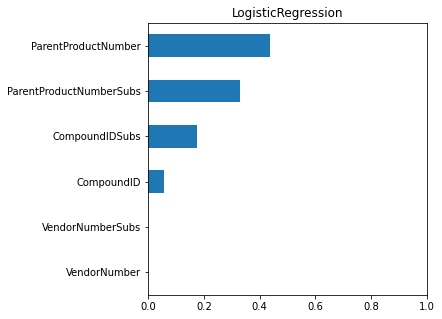

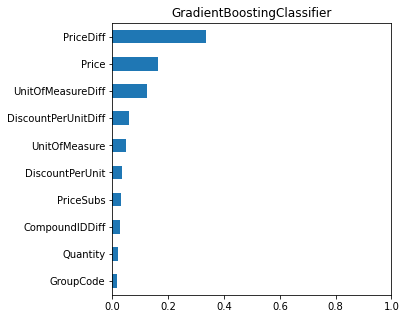

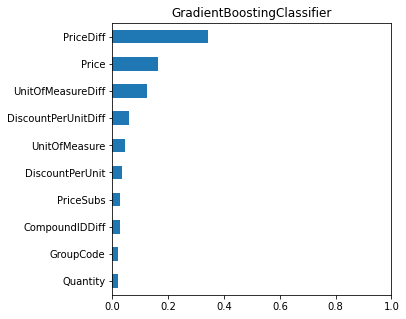

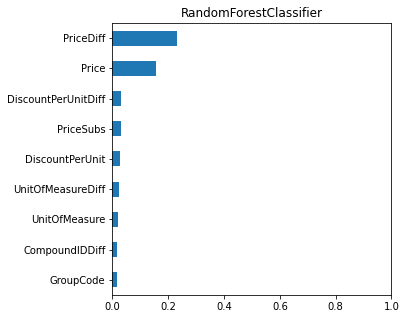

In [174]:
df_result = pd.DataFrame()

process_model(LogisticRegression(max_iter=1000), note='max_iter=1000', threshold=0.0000005)  # did not fit, return accuracy=0, so we increased max_iter from default 100
process_model(LogisticRegression(C=100, max_iter=1000, fit_intercept=False, warm_start=True), note='max_iter=1000, C=100, fit_intercept=False, warm_start=True', threshold=0.0000005, plot=True)

clf_GB = GradientBoostingClassifier(n_estimators=100)
process_model(clf_GB, plot=False, threshold=0.015, note='n_estimators=100')
clf_GB = GradientBoostingClassifier(ccp_alpha=0.0001, n_estimators=100, random_state=1234)
process_model(clf_GB, plot=False, threshold=0.015, note='ccp_alpha=0.0001, n_estimators=200, random_state=1234')
#process_model(clf_GB, plot=True, threshold=0.015, note='max_depth=None, max_leaf_nodes=None, min_samples_split=100, n_estimators=200, random_state=1234')

#process_model(AdaBoostClassifier(n_estimators=100))  # base estimator is DecisionTreeClassifier initialized with max_depth=1
clf_AB = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5), n_estimators=100, learning_rate=0.01)
process_model(clf_AB)

#process_model(RandomForestClassifier(n_estimators=64), plot=True, threshold=0.015)
#clf_RF = RandomForestClassifier(n_estimators=500, min_samples_split=6, criterion='entropy')
clf_RF = RandomForestClassifier(n_estimators=200, criterion='entropy', max_depth=None, min_samples_split=20, ccp_alpha=0.0003)
process_model(clf_RF, plot=True, threshold=0.015, note="n_estimators=200, criterion='entropy', max_depth=None, min_samples_split=20, ccp_alpha=0.0003")

process_model(KNeighborsClassifier(n_neighbors=39))

process_model(VotingClassifier(estimators=[('RF', clf_RF), ('GB', clf_GB), ('AB', clf_AB)], voting='soft'), note="('RF', clf_RF), ('GB', clf_GB), ('AB', clf_AB')")

if False: # ERROR: Classification metrics can't handle a mix of binary and continuous targets
  process_model(GradientBoostingRegressor(n_estimators=100, max_depth=5))
  process_model(BayesianRidge())
  process_model(Lasso())
  process_model(Ridge(alpha = 0.5))
if False: ## too long > 4 minutes
  process_model(LinearSVC(penalty='l2', loss='squared_hinge', dual=True, tol=0.0001, C=0.1, max_iter=20000)) # max_iter increaed from default 1000 to 3000, 6000, 20000 because did not coverged warning
  from sklearn import svm
  process_model(svm.SVC())
  process_model(svm.SVR())

d(df_result)

fname = f'Shufersal_result_{id}.csv'
df_result.to_csv(fname)

## Models - Using all categories as dummies - No change in the result


Result of running the models - no improvemnet using the dummies: shape = (54460, 2238)

running:  LogisticRegression
running:  LogisticRegression
running:  GradientBoostingClassifier
running:  GradientBoostingClassifier
running:  AdaBoostClassifier
running:  RandomForestClassifier
running:  KNeighborsClassifier
running:  VotingClassifier
0	1	precision	recall	f1-score	accuracy	support	precision_avg	recall_avg	f1-score_avg	note
name	index											
LogisticRegression: Train	0	0.0	12649.0	1.00	0.00	0.00	0.67	12649.0	0.83	0.50	0.40	max_iter=1000
1	0.0	25473.0	0.67	1.00	0.80	0.67	25473.0	0.83	0.50	0.40	
LogisticRegression: Test	0	0.0	5419.0	1.00	0.00	0.00	0.67	5419.0	0.83	0.50	0.40	max_iter=1000
1	0.0	10919.0	0.67	1.00	0.80	0.67	10919.0	0.83	0.50	0.40	
LogisticRegression: Train	0	0.0	12649.0	1.00	0.00	0.00	0.67	12649.0	0.83	0.50	0.40	max_iter=1000, C=100, fit_intercept=False, war...
1	0.0	25473.0	0.67	1.00	0.80	0.67	25473.0	0.83	0.50	0.40	
LogisticRegression: Test	0	0.0	5419.0	1.00	0.00	0.00	0.67	5419.0	0.83	0.50	0.40	max_iter=1000, C=100, fit_intercept=False, war...
1	0.0	10919.0	0.67	1.00	0.80	0.67	10919.0	0.83	0.50	0.40	
GradientBoostingClassifier: Train	0	7748.0	4901.0	0.79	0.61	0.69	0.82	12649.0	0.81	0.77	0.78	n_estimators=100
1	2006.0	23467.0	0.83	0.92	0.87	0.82	25473.0	0.81	0.77	0.78	
GradientBoostingClassifier: Test	0	3326.0	2093.0	0.78	0.61	0.69	0.82	5419.0	0.81	0.76	0.78	n_estimators=100
1	917.0	10002.0	0.83	0.92	0.87	0.82	10919.0	0.81	0.76	0.78	
GradientBoostingClassifier: Train	0	12649.0	0.0	1.00	1.00	1.00	1.00	12649.0	1.00	1.00	1.00	max_depth=None, max_leaf_nodes=None, min_sampl...
1	0.0	25473.0	1.00	1.00	1.00	1.00	25473.0	1.00	1.00	1.00	
GradientBoostingClassifier: Test	0	4128.0	1291.0	0.82	0.76	0.79	0.86	5419.0	0.85	0.84	0.84	max_depth=None, max_leaf_nodes=None, min_sampl...
1	936.0	9983.0	0.89	0.91	0.90	0.86	10919.0	0.85	0.84	0.84	
AdaBoostClassifier: Train	0	7352.0	5297.0	0.78	0.58	0.67	0.81	12649.0	0.80	0.75	0.76	
1	2095.0	23378.0	0.82	0.92	0.86	0.81	25473.0	0.80	0.75	0.76	
AdaBoostClassifier: Test	0	3167.0	2252.0	0.77	0.58	0.66	0.80	5419.0	0.79	0.75	0.76	
1	955.0	9964.0	0.82	0.91	0.86	0.80	10919.0	0.79	0.75	0.76	
RandomForestClassifier: Train	0	7366.0	5283.0	0.86	0.58	0.69	0.83	12649.0	0.84	0.77	0.79	n_estimators=200, criterion='entropy', max_dep...
1	1243.0	24230.0	0.82	0.95	0.88	0.83	25473.0	0.84	0.77	0.79	
RandomForestClassifier: Test	0	2971.0	2448.0	0.82	0.55	0.66	0.81	5419.0	0.81	0.74	0.76	n_estimators=200, criterion='entropy', max_dep...
1	669.0	10250.0	0.81	0.94	0.87	0.81	10919.0	0.81	0.74	0.76	
KNeighborsClassifier: Train	0	2262.0	10387.0	0.58	0.18	0.27	0.68	12649.0	0.64	0.56	0.54	
1	1652.0	23821.0	0.70	0.94	0.80	0.68	25473.0	0.64	0.56	0.54	
KNeighborsClassifier: Test	0	858.0	4561.0	0.51	0.16	0.24	0.67	5419.0	0.60	0.54	0.52	
1	824.0	10095.0	0.69	0.92	0.79	0.67	10919.0	0.60	0.54	0.52	
VotingClassifier: Train	0	12235.0	414.0	1.00	0.97	0.98	0.99	12649.0	0.99	0.98	0.99	('RF', clf_RF), ('GB', clf_GB), ('AB', clf_AB')
1	0.0	25473.0	0.98	1.00	0.99	0.99	25473.0	0.99	0.98	0.99	
VotingClassifier: Test	0	4005.0	1414.0	0.83	0.74	0.78	0.86	5419.0	0.86	0.83	0.84	('RF', clf_RF), ('GB', clf_GB), ('AB', clf_AB')
1	799.0	10120.0	0.88	0.93	0.90	0.86	10919.0	0.86	0.83	0.84	

## Models - Using Ratio - No change in the result

In [155]:
if RATIO:
  X = df_ratio.drop('CorrelateItemStatusCode', axis=1)
  y = df_ratio.CorrelateItemStatusCode.astype(int)

  X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)

  process_model(clf_RF, plot=True, threshold=0.015)
  d(df_result)

## Models - compare results of different datasets

1. Diff - full
2. Diff - remove ingredients
3. Diff - split based on date

In [202]:
def read_df_result(id='', disp=True, full=False):
  fname = f'Shufersal_result_{id}.csv'
  p(fname)
  df_result_t = pd.read_csv(fname, keep_default_na=False)
  df_result_t.set_index(['name', 'index'], inplace=True)
  pd.set_option("max_colwidth", 100)
  if not full:
    df_result_t = df_result_t.loc[['RandomForestClassifier: Train', 'RandomForestClassifier: Test']].copy()
  return df_result_t 

In [203]:
d(read_df_result())
d(read_df_result('remove ingredients'))
d(read_df_result('split based on date'))

Shufersal_result_.csv


0  ...                                                                                           note
name                          index          ...                                                                                               
RandomForestClassifier: Train 0      9267.0  ...  n_estimators=200, criterion='entropy', max_depth=None, min_samples_split=20, ccp_alpha=0.0003
                              1      1546.0  ...                                                                                               
RandomForestClassifier: Test  0      3804.0  ...  n_estimators=200, criterion='entropy', max_depth=None, min_samples_split=20, ccp_alpha=0.0003
                              1       879.0  ...                                                                                               

[4 rows x 11 columns]

Shufersal_result_remove ingredients.csv


0  ...                                                                                           note
name                          index          ...                                                                                               
RandomForestClassifier: Train 0      9246.0  ...  n_estimators=200, criterion='entropy', max_depth=None, min_samples_split=20, ccp_alpha=0.0003
                              1      1584.0  ...                                                                                               
RandomForestClassifier: Test  0      3787.0  ...  n_estimators=200, criterion='entropy', max_depth=None, min_samples_split=20, ccp_alpha=0.0003
                              1       894.0  ...                                                                                               

[4 rows x 11 columns]

Shufersal_result_split based on date.csv


0  ...                                                                                           note
name                          index          ...                                                                                               
RandomForestClassifier: Train 0      9240.0  ...  n_estimators=200, criterion='entropy', max_depth=None, min_samples_split=20, ccp_alpha=0.0003
                              1      1538.0  ...                                                                                               
RandomForestClassifier: Test  0      3791.0  ...  n_estimators=200, criterion='entropy', max_depth=None, min_samples_split=20, ccp_alpha=0.0003
                              1       888.0  ...                                                                                               

[4 rows x 11 columns]

In [ ]:
def read_df_result(id='', full=False):
  fname = f'Shufersal_result_{id}.csv'
  df_result_t = pd.read_csv(fname, keep_default_na=False)
  df_result_t.set_index(['name', 'index'], inplace=True)
  pd.set_option("max_colwidth", 100)
  if not full:
    df_result_t = df_r.loc[['RandomForestClassifier: Train', 'RandomForestClassifier: Test']].copy()
  return df_result_t 

# Grid Search for hyperparameters - on best model RandonForest

In [156]:
GS = False

It run for few hours and then colab disconnected - it was to preform 5880 checks. From the partial results (because Verbose=4) I saw that n_estimators=500, min_samples_split=6, criterion='entropy' gives better results so we implemented them and we can see that indeed precision was improved from 84% to 85% 

In [157]:
if GS:
  clf_RF = RandomForestClassifier(n_estimators=64)
  clf_RF.fit(X_train, y_train)
  p(clf_RF.score(X_train, y_train))
  p(clf_RF.score(X_test, y_test))

0.9999475368553591

0.8557350960949933

In [158]:
def run_GS(model, param_grid, n_jobs=-1, cv=5, verbose=4):
  if verbose > 3 and n_jobs == -1:
    p('Warning: when n_jobs=-1 no partial results are displayed')
    p('Change one of the parameters - Aborted')
    return
  clf_gs = GridSearchCV(model, param_grid, cv=cv, verbose=verbose, n_jobs=n_jobs)
  clf_gs.fit(X_train, y_train)

  p('Results')
  clf_gs.estimator
  p(clf_gs.best_params_)
  p(clf_gs.best_estimator_)
  p('After')
  p(clf_gs.score(X_train, y_train))
  p(clf_gs.score(X_test, y_test))

In [159]:
if GS:
  param_grid = { 
      'max_depth' : [None, 8, 15],
      'ccp_alpha': [0.0001, 0.0005, 0.0008, 0.001],
      'n_estimators': [100, 200],
  #    'max_features': ['auto', 'sqrt', 'log2', 1.0, 0.75, 0.5, 0.25],
      'max_leaf_nodes': [None, 4, 10, 20],
      'min_samples_split': [2, 10, 20],
      'random_state': [1234]
  }
  model = GradientBoostingClassifier()
  run_GS(model, param_grid, n_jobs=1, cv=2, verbose=4)

n_estimators=100, ccp_alpha=0.0001, random_state=1234

In [160]:
if GS:
  param_grid = { 
      'max_depth' : [None, 4,5,6,7,8],
      'ccp_alpha': [0.01, 0.02, 0.03, 0.1],
  #    'n_estimators': [64, 200, 500],
  #    'max_features': ['auto', 'sqrt', 'log2', 1.0, 0.75, 0.5, 0.25],
      'criterion' :['gini', 'entropy'], 
  #   'max_leaf_nodes': [None, 4, 10, 20],
      'min_samples_split': [20, 100, 500]#[2, 4, 6, 8, 10, 12, 14]
  }
  model = RandomForestClassifier()
  run_GS(model, param_grid, n_jobs=-1, cv=2, verbose=3)

In [161]:
if GS:
  param_grid = { 
      'max_depth' : [None, 4,8,10],
      'ccp_alpha': [0.005, 0.01, 0.015],
  #    'n_estimators': [64, 200, 500],
  #    'max_features': ['auto', 'sqrt', 'log2', 1.0, 0.75, 0.5, 0.25],
      'criterion' :['entropy'], 
  #   'max_leaf_nodes': [None, 4, 10, 20],
      'min_samples_split': [10, 20, 30]
  }

  model = RandomForestClassifier()
  run_GS(model, param_grid, n_jobs=-1, cv=2, verbose=3)

> output:

Fitting 5 folds for each of 144 candidates, totalling 720 fits

{'ccp_alpha': 0.01, 'criterion': 'entropy', 'max_depth': 8, 'min_samples_split': 20}

In [162]:
if GS:
  param_grid = { 
      'max_depth' : [None, 4,8,10],
      'ccp_alpha': [0.005, 0.01, 0.015],
  #    'n_estimators': [64, 200, 500],
  #    'max_features': ['auto', 'sqrt', 'log2', 1.0, 0.75, 0.5, 0.25],
      'criterion' :['entropy'], 
  #   'max_leaf_nodes': [None, 4, 10, 20],
      'min_samples_split': [10, 20, 30]
  }

  model = RandomForestClassifier()
  run_GS(model, param_grid, n_jobs=-1, cv=2, verbose=3)

> Output

Fitting 5 folds for each of 36 candidates, totalling 180 fits

{'ccp_alpha': 0.005, 'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 20}

Train: 0.7725460364094224

Test: 0.7751866813563472

In [163]:
if GS:
  param_grid = { 
      'max_depth' : [None],
      'ccp_alpha': [0.001, 0.003, 0.005],
      'criterion' :['entropy'], 
      'min_samples_split': [20],
      'n_estimators': [64, 200, 500],
  }
  model = RandomForestClassifier()
  run_GS(model, param_grid, n_jobs=-1, cv=2, verbose=3)

> Output

Fitting 5 folds for each of 9 candidates, totalling 45 fits

{'ccp_alpha': 0.001, 'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 20, 'n_estimators': 200}

Train: 0.8159592885997586

Test: 0.8142367486840495

In [164]:
if GS:
  param_grid = { 
      'max_depth' : [None],
      'ccp_alpha': [0.0001, 0.0005, 0.0008, 0.001],
      'criterion' :['entropy'], 
      'min_samples_split': [20],
      'n_estimators': [200, 300],
  }
  model = RandomForestClassifier()
  run_GS(model, param_grid, n_jobs=-1, cv=2, verbose=3)

> Output

Fitting 5 folds for each of 8 candidates, totalling 40 fits (15 mins)

{'ccp_alpha': 0.0001, 'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 20, 'n_estimators': 200}

Train: 0.921698756623472

Test: 0.8595299302240176

In [165]:
if GS:
  clf_RF = RandomForestClassifier(n_estimators=200, criterion='entropy', max_depth=None, min_samples_split=20, ccp_alpha=0.0005)
  clf_RF.fit(X_train, y_train)
  p(clf_RF.score(X_train, y_train))
  p(clf_RF.score(X_test, y_test))

In [166]:
for i in range(11):
  ccp_alpha = 0.0001 + i / 10000
  clf_RF = RandomForestClassifier(n_estimators=200, criterion='entropy', max_depth=None, min_samples_split=20, ccp_alpha=ccp_alpha)
  p(ccp_alpha)
  clf_RF.fit(X_train, y_train)
  p(clf_RF.score(X_train, y_train))
  p(clf_RF.score(X_test, y_test))

0.0001
0.92099050417082
0.8581221691761538
0.0002
0.8918734588951261
0.8532868160117517
0.00030000000000000003
0.8697340118566707
0.8465540457828375
0.00039999999999999996
0.8531294265778291
0.8393316195372751
0.0005
0.843397513246944
0.8332109193291712
0.0006000000000000001
0.835554273123131
0.8291100501897417
0.0007
0.8297308640679922
0.824764353041988
0.0008
0.8247993284717486
0.8212755539233688
0.0009000000000000001
0.820576045328157
0.8159505447423185
0.001
0.8152510361471067
0.8126453666299425
0.0011
0.8130475840721892
0.810258293548782


# Cross validation

In [167]:
CV = False
if CV:
  k = 7
  scores = cross_val_score(clf_RF, X_train, y_train, cv=k)
  p("\nscores : " + (k * "{:.3f}, ").format(*scores))
  p("mean : {:.3f} std : {:.3f} ".format(scores.mean(), scores.std()))

scores : 0.839, 0.848, 0.842, 0.848, 0.837, 0.843, 0.843, 
mean : 0.843 std : 0.004 

# TODO:

## run a model with the important feature alone to show is it a must or just necessary (if the drop in precision is large it is not a must)?

## Bagging (Bootstrap Aggregation)

> One classifier ("base model") and try to fit many different subsamples of the data

> The hyper-parameters "max_samples" and "max_features" control the size of the subsets

> The hyper-parameters "bootstrap" and "bootstrap_features" control wether the samples and the features are drawn with (or without) replacement

In [168]:
clf_base = DecisionTreeClassifier(max_depth=5)

In [169]:
clf_bagging = BaggingClassifier(base_estimator=clf_base, n_estimators=50)
clf_bagging.fit(X_train, y_train)

clf_bagging.score(X_train, y_train)
clf_bagging.score(X_test, y_test)

0.7853470437017995

## Correlation